# Data Science

***


WS 2023

Dr. Cristian Grozea


***

## Data Science


### k-Nearest Neighbours


# Course Plan

1. #Introduction to Machine Learning (ML)
    * #Examples of Applications
    * #Types of machine learning
    * #Issues around ML
    * #Testing and Validation
1. Classification and Regression
    * #Datasets
    * #Binary classification
    * #Accuracy measures
    * #Multiclass classification
1. Various model types and Training models
    * #Linear regression
    * #Polynomial regression
    * Regularisation (self-study - p.32-, p.155-, p.202-)
    * Logistic Regression (to be covered briefly)
    * Training Models
1. **[today]Local learning/k-NN**
1. Support Vector Machines (self-study - Chapter 5 p.175-)
1. Decision Trees
1. Ensemble Learning, Random Forest, XGBoost
1. Dimensionality Reduction
1. Unsupervised Learning
1. #Statistics: Definitions and Tools
1. Neural Networks/Deep Learning
1. Reinforcement Learning, Deep Reinforcement Learning
    


# Local learning
- A complex problem can usually be decomposed into less complex subproblems

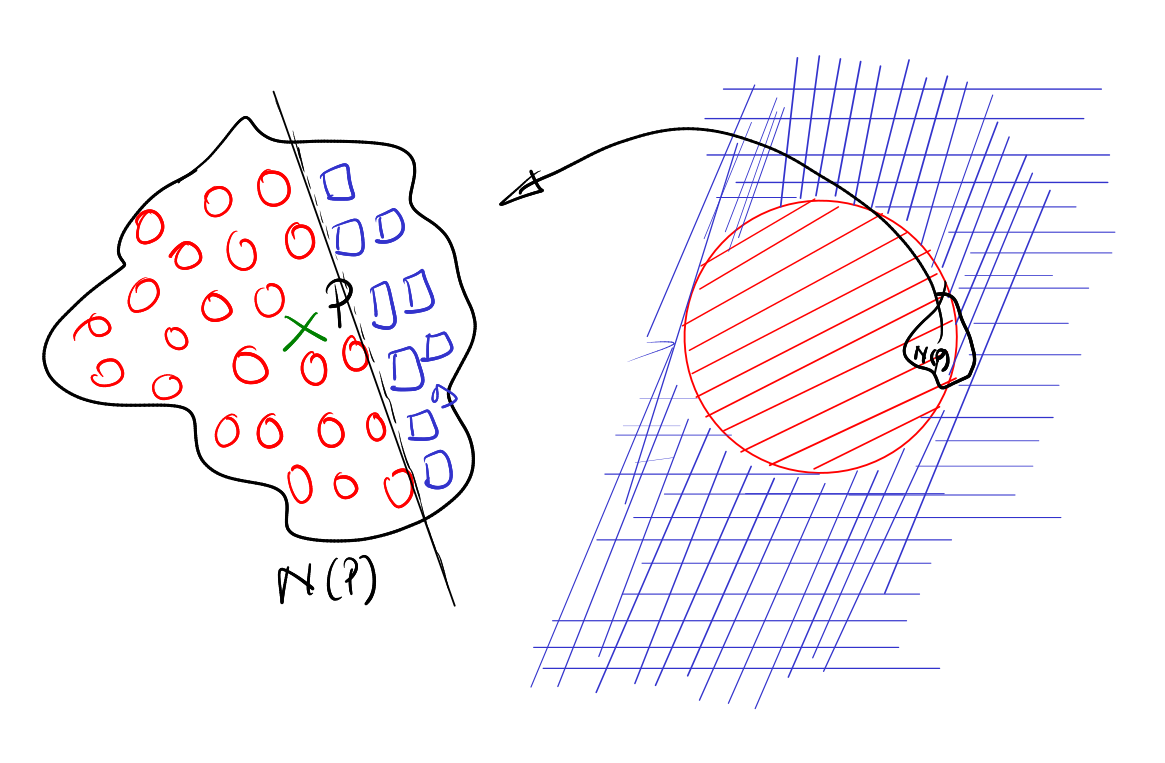

- When one has to predict on a new point $P$:
    - isolate a neighbourhood of $P$, $N(P)$ 
    - consider the subproblem made of all datapoints that fall into this neighbourhood $N(P)$
    - fit a model $M$ for this problem 
    - use it to predict for the point, prediction is $M.predict(P)$
- Advantages:
    - The smaller local neighbourhood might allow for simpler models
        - in the example the nonlinear boundary can be locally approximated by a linear boundary
- Disadvantages:
    - Speed - each prediction requires a local model fitting
    - It might require more data than otherwise - but it depends on how the neighbourhoods are defined
- Examples:
    - k-NN density estimation
    - k-NN classification
    - k-NN regression (K-nearest neighbour)
    

## K-NN Density estimation

What is density estimation?

What is the density of a continuous random variable?

definition by chatgpt(2022) https://chat.openai.com

Q: explain in simple terms, what is the density of random variable?

A: 
> In simple terms, the density of a random variable is a measure of how likely it is for the random variable to take on a particular value. For example, if a random variable has a high density at a certain value, then it is more likely to take on that value than if it had a low density at that value. The density of a random variable is typically represented by a function called the probability density function (PDF), which gives the density of the random variable for all possible values that it can take on. The PDF is often used to make predictions about the future values of the random variable, or to compare the distribution of values across different groups or conditions.

Possible to define mathematically starting with the cummulative distribution function, CDF, see https://en.wikipedia.org/wiki/Cumulative_distribution_function

$$CDF_X(a)=P(X<a)$$

$$PDF_X=CDF_X'$$

Q: what are examples of open problems in data science?

A: 
There are many open problems in data science, some of which include:

Developing more effective methods for learning from unstructured or incomplete data. #house pricing

Improving the interpretability and fairness of machine learning models. #credit system favours poor/rich people differently

Finding ways to integrate and make sense of data from multiple sources and formats.

Developing new algorithms and approaches for dealing with large-scale and high-dimensional data. #data fusion - fusing data from different places and different times

Developing more effective methods for dealing with data that is noisy, biased, or collected from non-representative samples.

Finding ways to improve the efficiency and scalability of data processing and analysis algorithms.

Developing new tools and techniques for visualizing and exploring complex data sets.

Developing new approaches for addressing privacy and security concerns in data collection, storage, and analysis. #collection is very unsecure

Finding ways to apply data science techniques to solve real-world problems in a variety of domains, such as healthcare, finance, and education.

Developing new theoretical foundations for data science, and understanding the limitations and potential risks of existing methods.

### some data

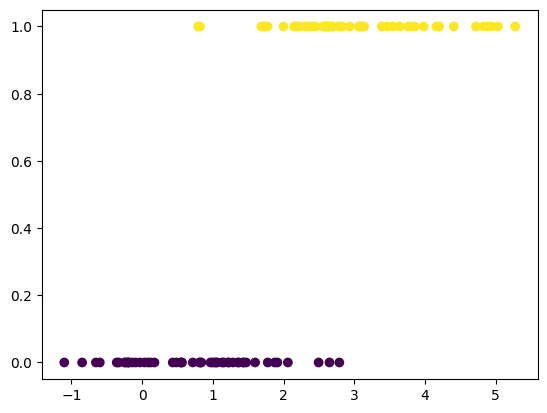

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
np.random.seed(81)

x,y=sklearn.datasets.make_blobs(centers=[[1],[3]], n_features=1,cluster_std=1)
#make blobs used to make synthetic datasets. Seperated clouds of data
#features=1 menas data is on one line.
#cluster_std = standard devaiation = 1.

plt.scatter(x,y,c=y)
x0=x[y==0] #save the values from one class (centered at 1)

### Optimal decision
Gaussian pdf
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

#signal processing, statistics, etc.. similar to numpy

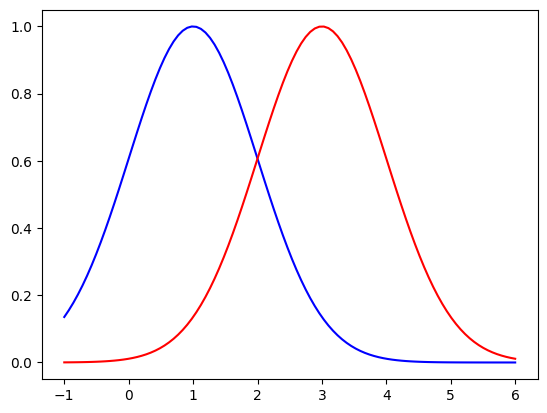

In [3]:
#all this is gaussion distribution
t=np.linspace(-1,6,100) #-1 to 6 divided into 100 points
plt.plot(t,np.exp(-(t-1)**2/2),'b') #computing PDF by formula
plt.plot(t,np.exp(-(t-3)**2/2),'r')
#-1 and -3 are to make them centre at 1 and 3
#because we have 2 data with ends at 1 and 3 - see above
#we want to get the density because we are doing PDF - which is being used to determine
#a point's class based on density
#till 2, there is a higher density for class blue
#after 2, there is a higher density for class red
#we need to find the probability of the class given the point
#based on probability of point given the class. BAYES CLASSIFIER
#we want to go as close as possible to the optimal decision

Text(0.5, 0, 'value')

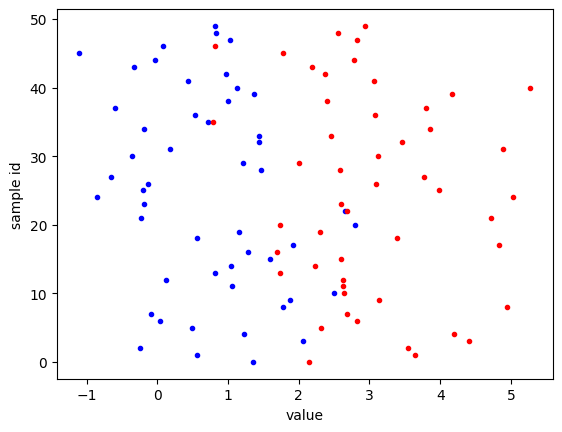

In [4]:
plt.figure()
plt.plot(x[y==0],range(sum(y==0)),'b.'); plt.ylabel('sample id');plt.xlabel('value')
plt.plot(x[y==1],range(sum(y==0)),'r.');  plt.ylabel('sample id');plt.xlabel('value')
#spread the whole data by the ID of the points
#when we project the points down onto x axis, position 1 will have highest density
#x0 = class0
#x1 = class1

- how dense is the data in a given point?
- where is the density of the data higher?

Text(0.5, 1.0, 'a statistical view (CDF)')

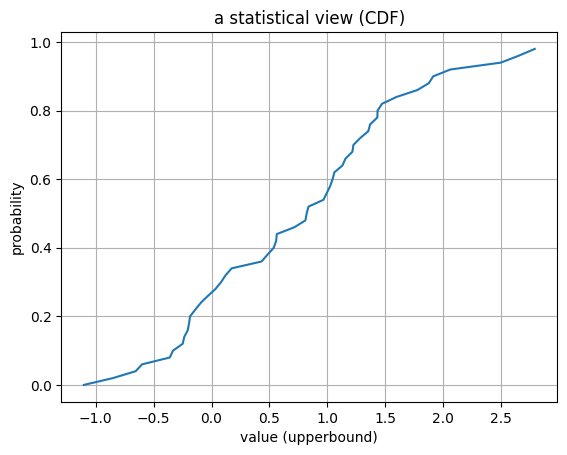

In [5]:
plt.plot(sorted(x0),np.arange(len(x0))/len(x0)); plt.ylabel('probability');plt.xlabel('value (upperbound)');plt.grid(1)
plt.title('a statistical view (CDF)')
#need to take the derivative.

Text(0.5, 1.0, 'a different view')

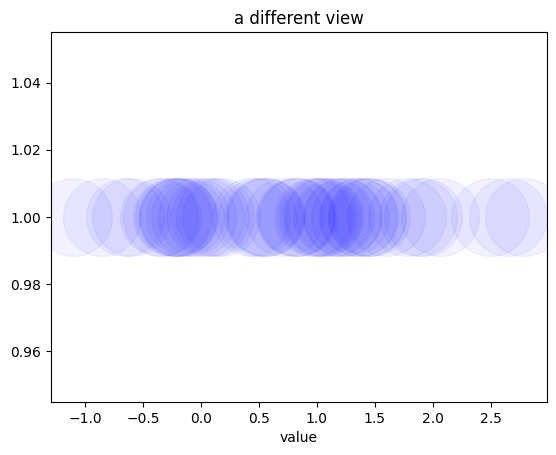

In [6]:
plt.plot(x0,np.ones(len(x0)),'bo',ms=56,alpha=0.05);plt.xlabel('value')
plt.title('a different view')
#alpha view - to see the density?

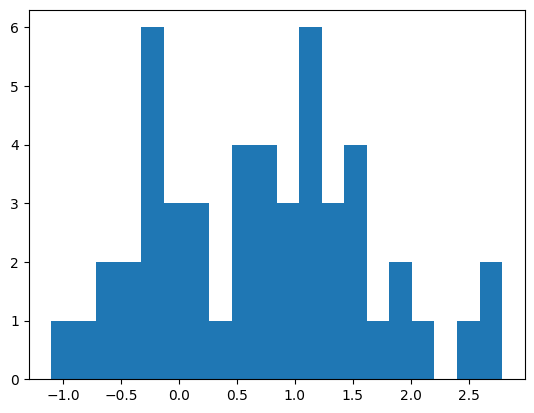

In [7]:
#histogram
#plt.hist(x0,8);
#add more bins so that graph looks better
plt.hist(x0,20);

## Deriving k-NN classifer as a local density estimator

- Fixed neighbourhood (sphere of always the same radius)
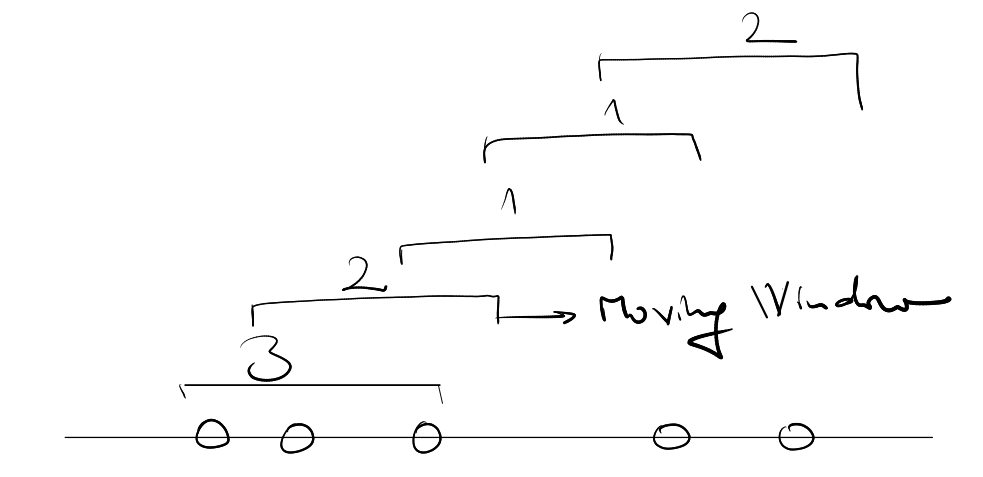

$$density \approx \frac{k}{V}$$
- $V$=the volume o the neighbourhood
- $k$=how many points are inside
- what if only two points in?
- what if only one point of a single class in?

In [29]:
#as you move the window, you can see the number of points density in that window
#window size = 3

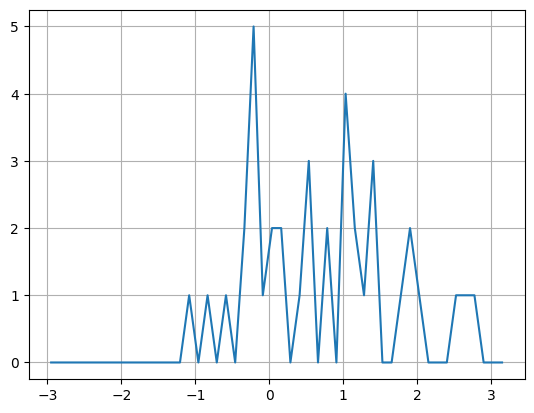

In [9]:
width=0.1
inside=[sum((x0>=left) & (x0<left+width)) for left in np.linspace(-3,3.100)]
plt.plot(np.linspace(-3,3.100)+width/2,inside)
plt.grid(1)
#

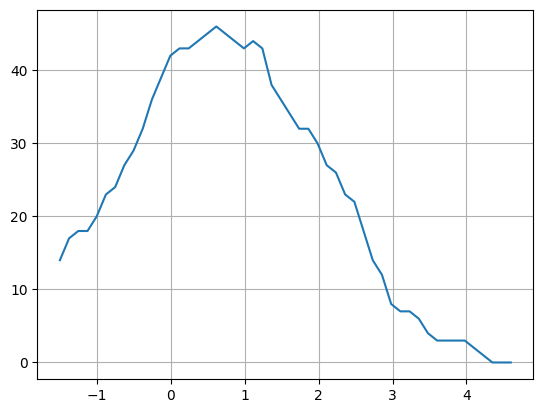

In [10]:
#width=1
#width1 is too small because it is too fine
width=3
#width3 means window is too large
#width=10
#we are estimating the density based on the moving window
#hence, we want a window which will always have the same number of points inside the window
#hence the density won't always be the same
#this is the principle behind KNN
inside=[sum((x0>=left) & (x0<left+width)) for left in np.linspace(-3,3.100)]
plt.plot(np.linspace(-3,3.100)+width/2,inside)
plt.grid(1)

- with the right window width, it provides a more nuanced view than the histogram
- how to find the corect window size?
- **k-NN approach**: take the smallest window that contains **k** samples

$$density \approx \frac{k}{V}$$


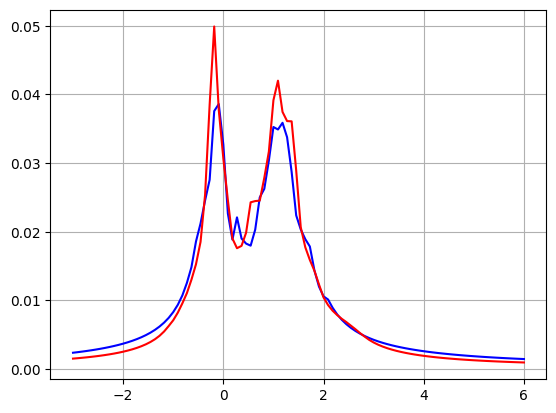

In [11]:
import sklearn.metrics
points=np.linspace(-3,6,100)
dmat=sklearn.metrics.pairwise_distances(points[:,np.newaxis],x0)
#compute the distance between every point in my window and every point in my set
#so we need to compute the distance from the point to see how far we need to go from that
#point in order to get the number of points in that window
distances_sorted=np.sort(dmat,axis=1)

k=10
distknnorig=k/distances_sorted[:,k-1]
distknn=k/np.mean(distances_sorted[:,:k],axis=1)# hinted by chatgpt

distknnorig/=np.sum(distknnorig)
distknn/=np.sum(distknn)


# plt.imshow(distances_sorted)
# plt.colorbar()

plt.plot(points,distknnorig,'b-')
plt.plot(points,distknn,'r-')
plt.grid(1)

#you will never get 0 density because you will keep extending till you get the desired number
#of points
#in KNN - window length is dynamic
#window size is fixed
#can play around by changing k=2 value above

## k-NN classification

- as the volume is the same, only how many of the nearest $k$ neighbours are in each of the classes matters


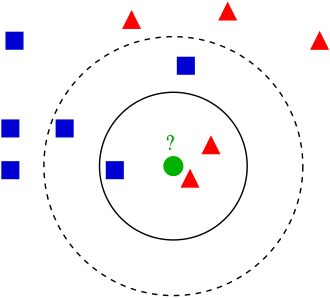`
[https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm]

Diuscussion: how large should be $k$?

[ https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html ]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


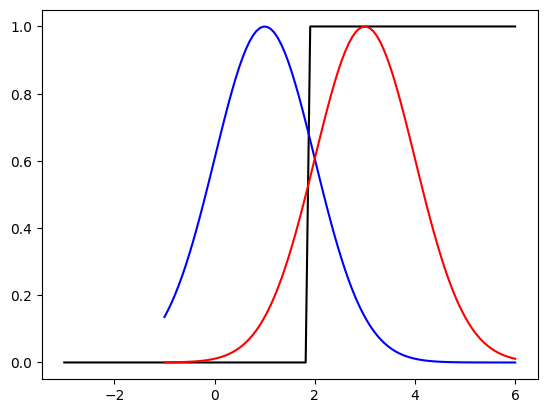

In [12]:
#k by default is 5
#small k is underfitting, large is overfitting
from sklearn.neighbors import KNeighborsClassifier
k=10
points=np.linspace(-3,6,100)
model=KNeighborsClassifier(n_neighbors=k)
model.fit(x,y)
yhat=model.predict(points[:,np.newaxis])
print(yhat)
plt.plot(points,yhat,'k')
plt.plot(t,np.exp(-(t-1)**2/2),'b')
plt.plot(t,np.exp(-(t-3)**2/2),'r')
#near 2 more errors because density/AUC(area under curve) of both is very high
#but some errors we cannot avoid because we can't do overfitting

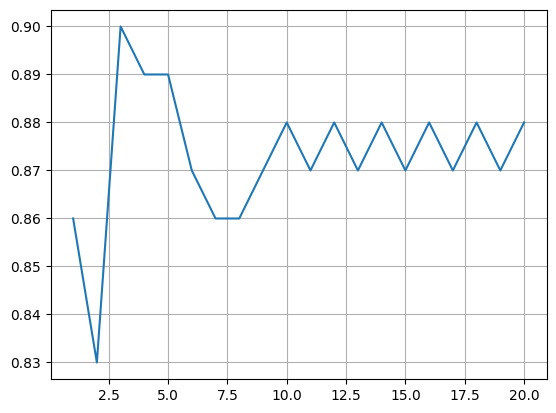

In [67]:
#how to compute best K = can't with accuracy coz will leave out few points
#can't with stratify also because still same problem
#so have to do with cross validation
#cv
from sklearn.model_selection import cross_val_score
rr=range(20)
plt.plot([k+1 for k in rr],
 [np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=k+1),x,y,cv=5)) 
  for k in rr])
plt.grid(1)
#we can't take k=3 as the best because just below 3 has one of the worst accuracies
#so we can take something like k=12 because more stable to its left and right
#k here is a hyperparameter
#knn is the easiest classification
#voronoi is what happens when k=1. We will then get very strange seperation boundaries.
#example of overfitting
#small change of points will change the entire boundary

### Theoretical result about the performance of $k-NN$

For two classes, when the size of the training set tends towards infinity, the error is bounded by twice the Bayes error rate (the lowest error rate possible)


[https://en.wikipedia.org/wiki/Voronoi_diagram]
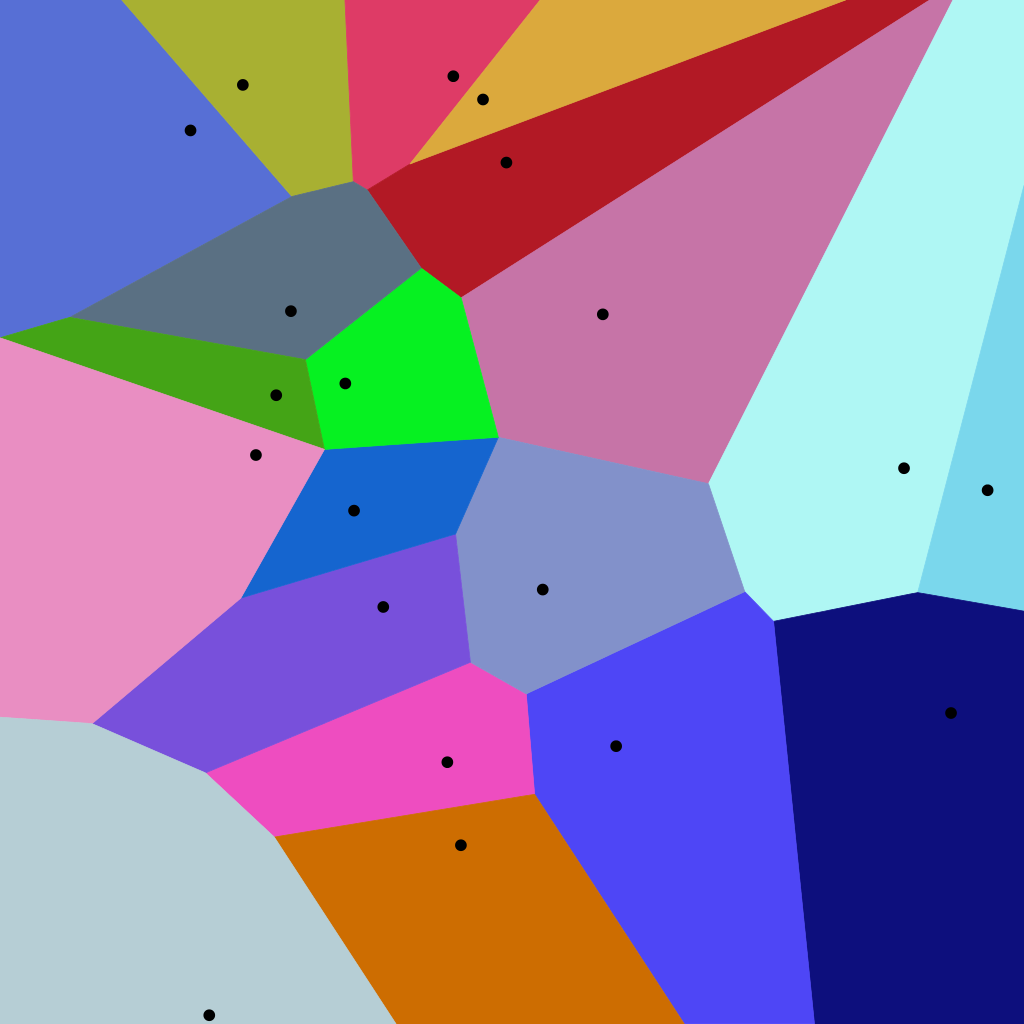
see also [https://www.shadertoy.com/view/MslGD8 ]

Discussion:
- choice of distance #for example, weather is measured with temp and humidity and both of them use different scales. And if you go from celsius to fahrenheit then it will change again. So each time we need to decide what distance is the correct distance. So distance is relevant
- similarity functions #like ecualidion distance. There are anti similarity. High similarity when points are close and low sim wen points are far. Kind of like KNN only. Scalar or dot product is a vector product and this is a similarity. If they are unsimilar then they will produce 0 (perpendicular).
- kernels #computes a similarity function (dot product)


L1 distance (Manhattan distance)

Points 

1000 1

2000 1

1000 7

2000 8


Distance matrix

0    1000    6   1007

1000    0  1006    7

6     1006   0   1001

1007  7    1001   0


*10^-9
*1

# Example: k-NN for Breast Cancer data
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
cancer = load_breast_cancer()

In [20]:
#multivariant multiple dimensions in a random variable. Means more than 1 feature
#knn doesn't give densities

In [21]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [22]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [23]:
cancer.data.shape

(569, 30)

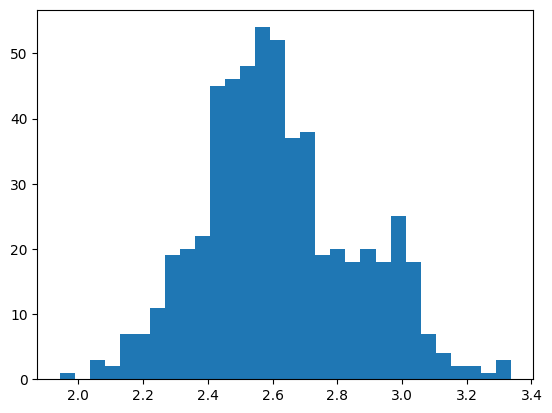

In [24]:
plt.hist(np.log(cancer.data[:,0]),30);
#these are log normal distributed
#plt.hist(np.log(cancer.data[:,16]),30);
#for 16 won't work because we are taking the log
#it is not uniform
#it looks gaussian

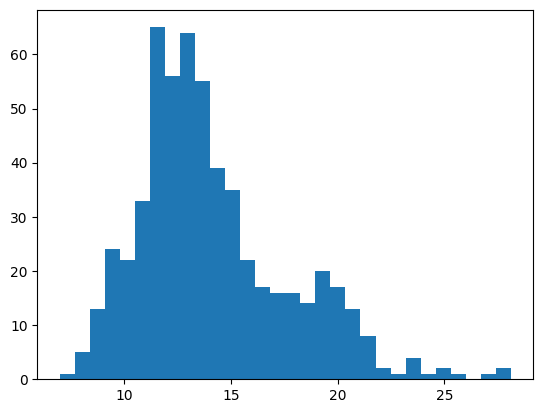

In [25]:
plt.hist(cancer.data[:,0],30);
#this is why we do log so that we can normalize
#then we do rescaling

In [26]:
#we need to make standard deviation=1
#standard scalar makes the standard deviaiton=1 so that all data looks same
#google sklearn standard scaler

In [28]:
df.head(6)
#show only first 6 rows
#we can see that some values are so high compared to others which are relatively close

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   
5           0.17000          0.1578              0.08089         0.2087   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   
5                 0.07613  ...         15.47          23.75           103.40   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   
5       741.6            0.1791             0.5249           0.5355   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  
5                0.1741          0.3985                  0.12440  

[6 rows x 30 columns]

C:\Users\YASHWANTH PINDI\AppData\Local\Temp\ipykernel_14672\1249934815.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


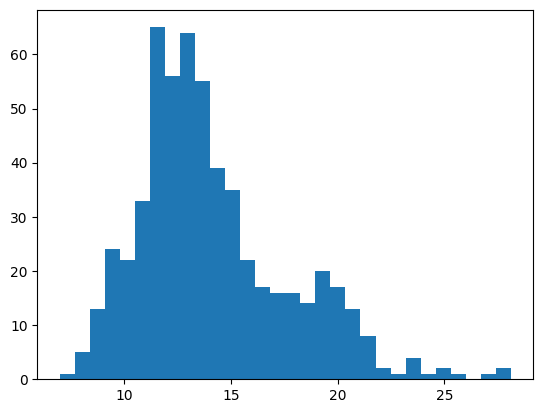

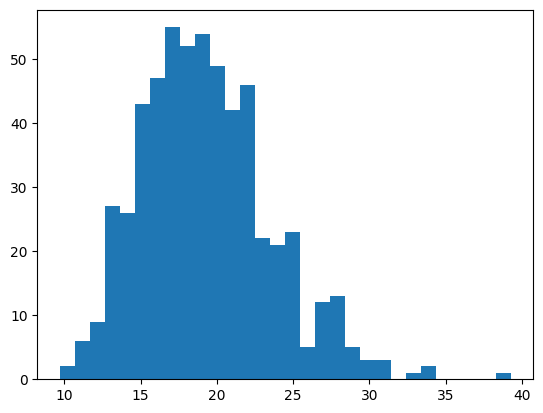

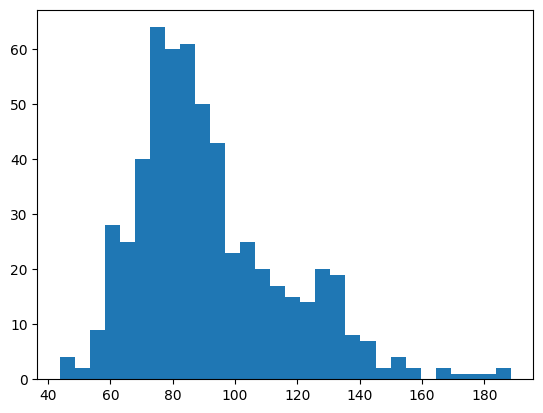

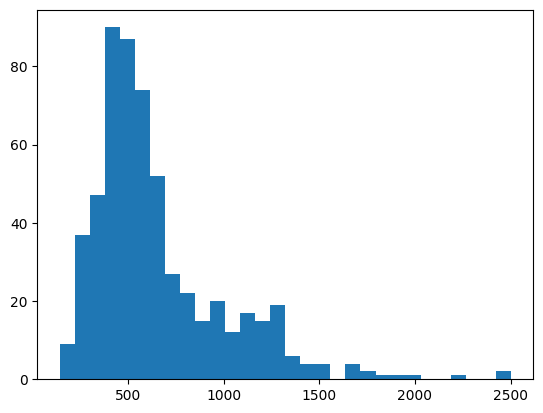

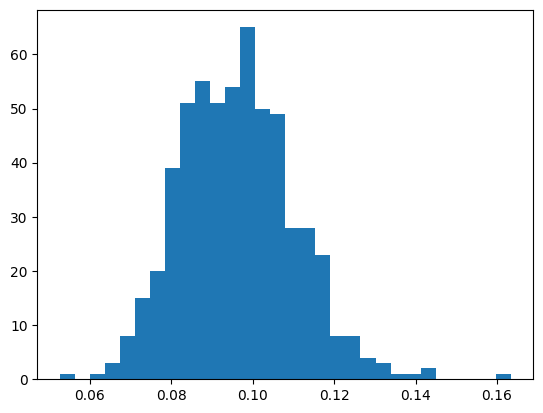

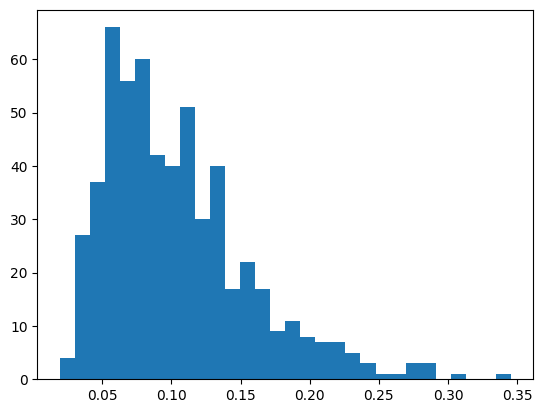

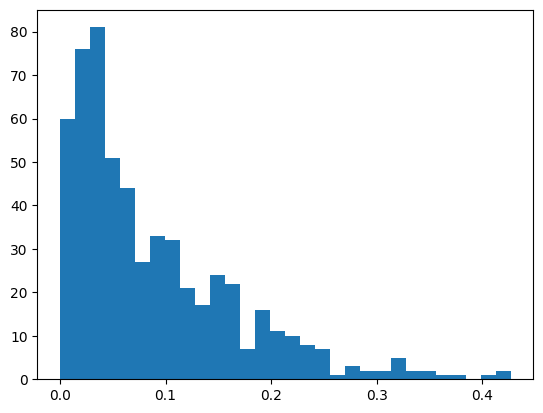

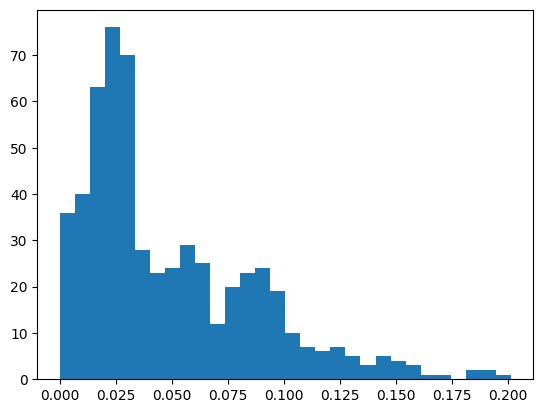

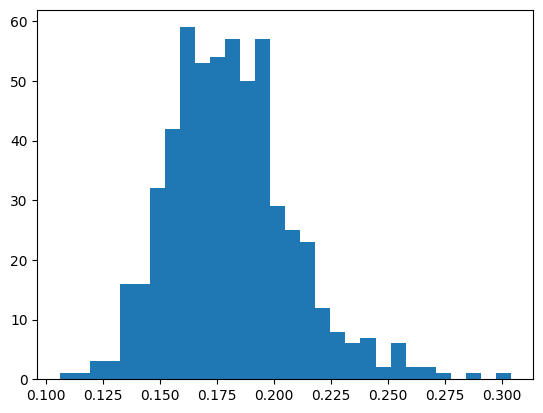

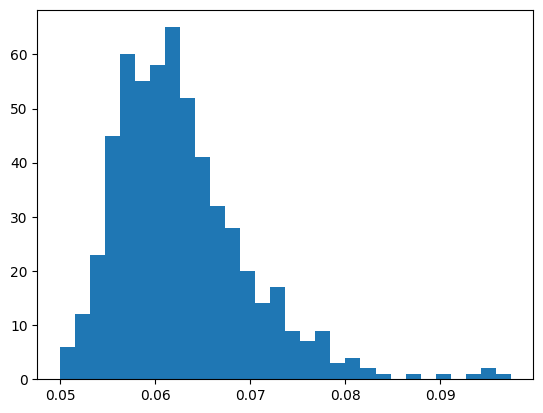

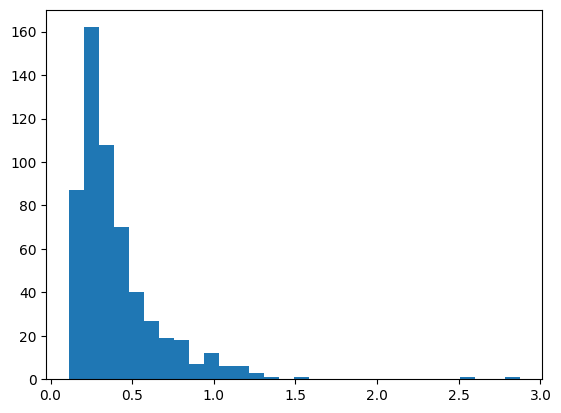

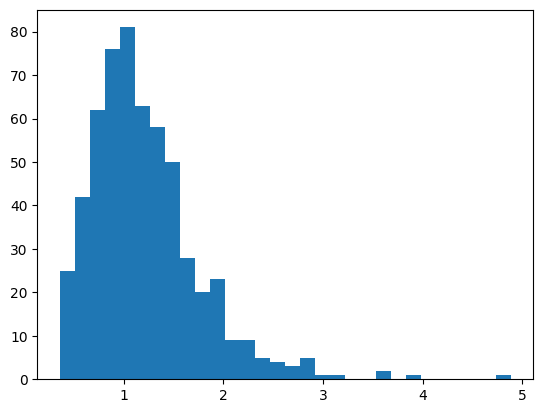

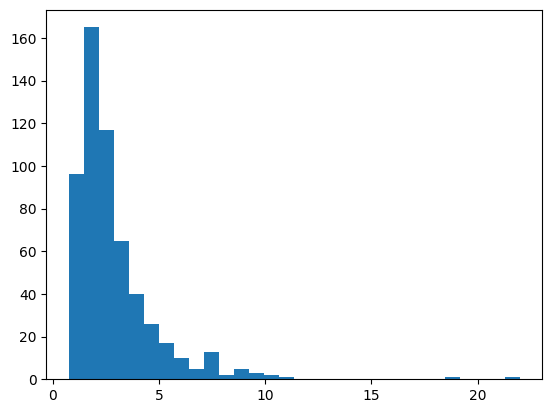

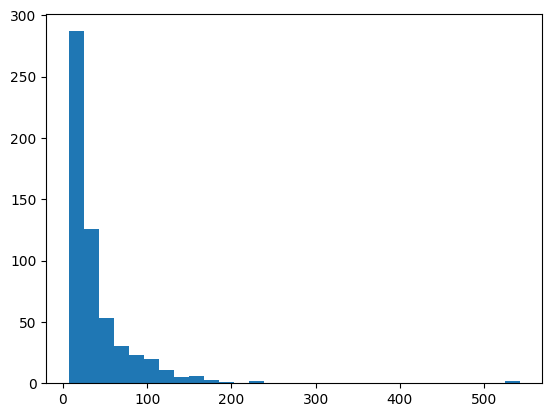

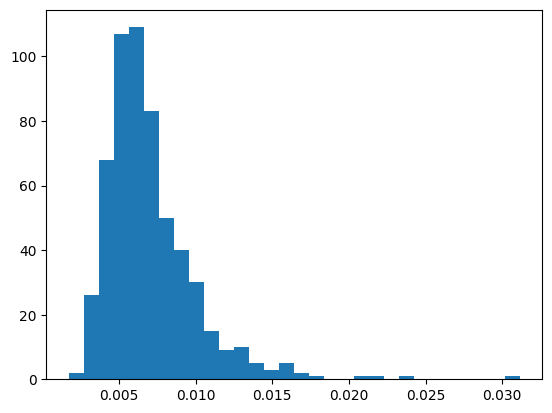

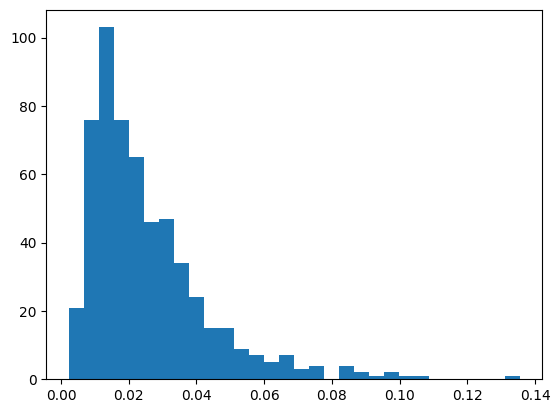

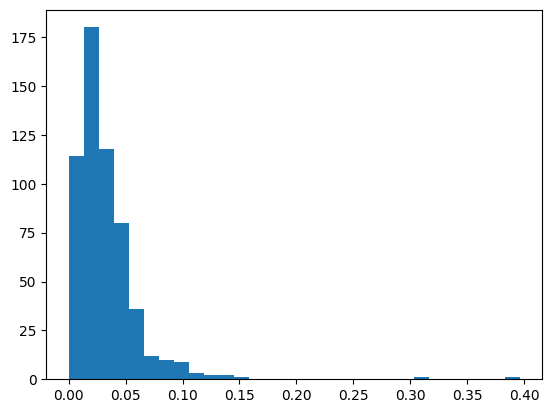

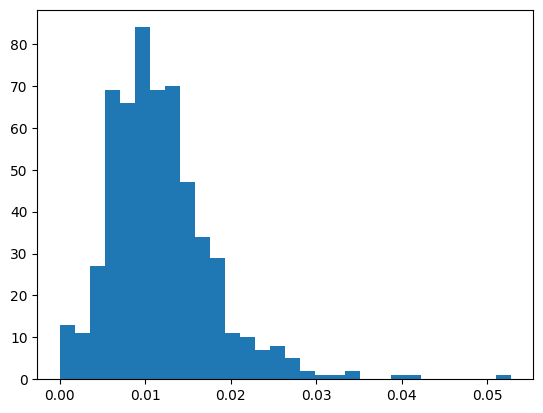

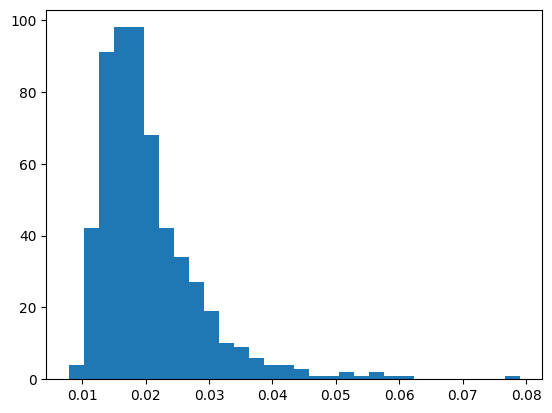

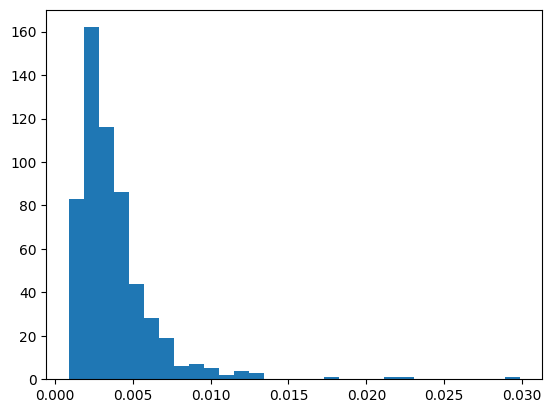

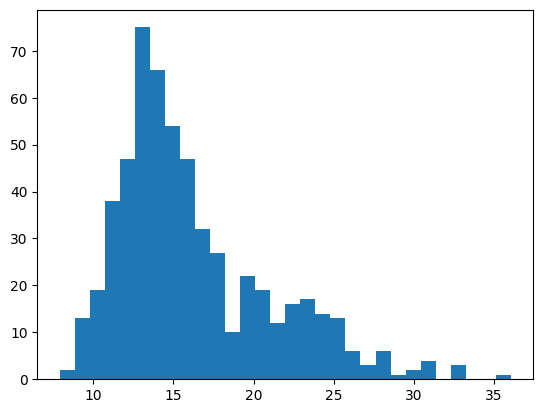

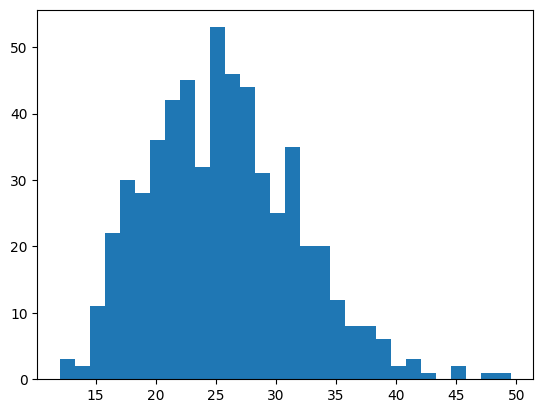

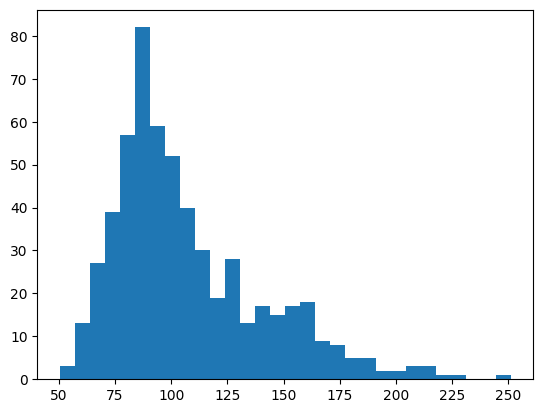

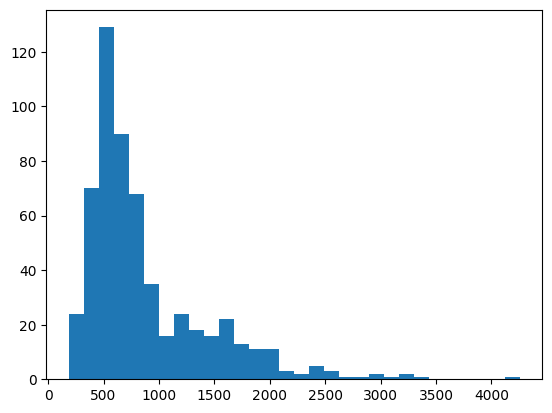

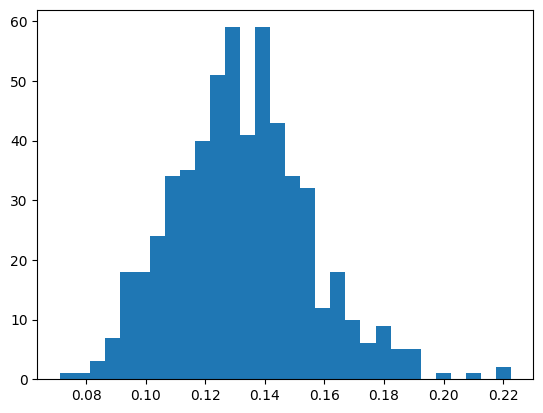

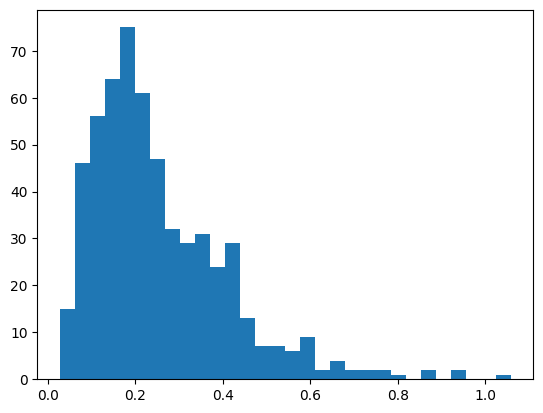

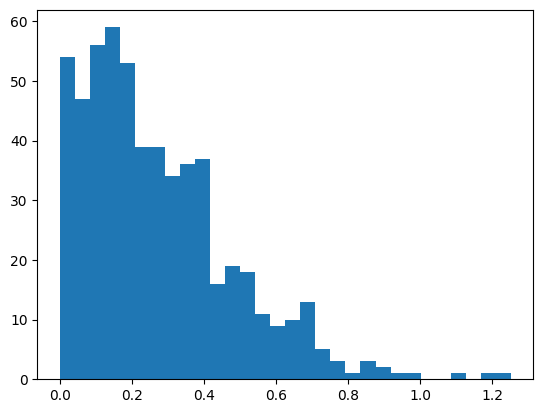

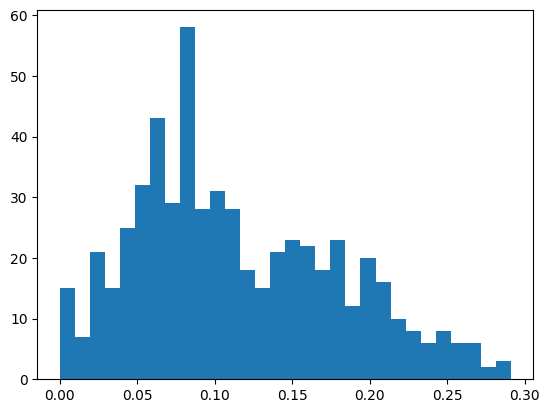

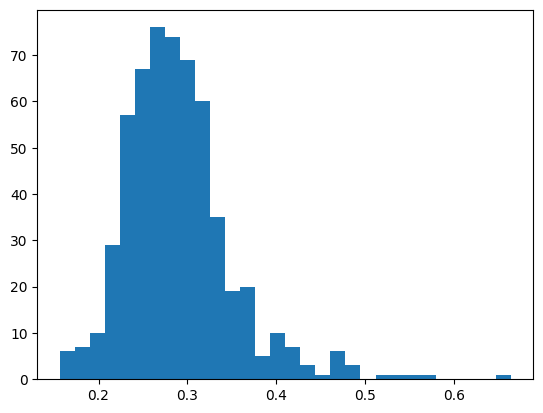

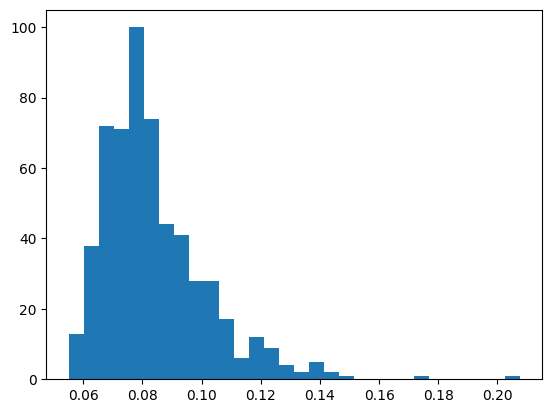

In [29]:
for i in range(30):
    plt.figure()
    plt.hist(cancer.data[:,i],30)

In [30]:
df.head(5)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [32]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [33]:
#standardize
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(cancer.data)

from sklearn.preprocessing import MinMaxScaler
data01=MinMaxScaler().fit_transform(cancer.data)

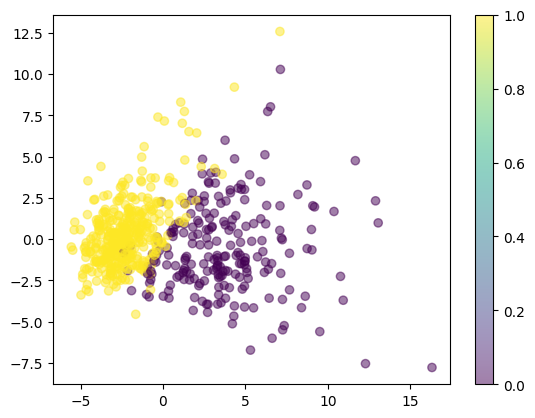

In [37]:
from sklearn.decomposition import PCA
# z=PCA(n_components=2,whiten=False).fit_transform(cancer.data)
z=PCA(n_components=2,whiten=False).fit_transform(standardized_data)
# z=PCA(n_components=2,whiten=False).fit_transform(data01)
# z
plt.scatter(z[:,0],z[:,1],c=cancer.target,alpha=0.5)
plt.colorbar()
#not perfectly seperable yet

In [38]:

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)
#by default, removes mean and removes scale

scaler = MinMaxScaler()
data_scaled01 = scaler.fit_transform(cancer.data)
#will bring all values between 0 and 1

In [39]:
#df = pd.DataFrame(data_scaled01, columns=cancer.feature_names)
df = pd.DataFrame(data_scaled, columns=cancer.feature_names)
df.head(3)
#now all values are between 0 and 1

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                2.255747  ...      1.886690      -1.359293         2.303601   
1               -0.868652  ...      1.805927      -0.369203         1.535126   
2               -0.398008  ...      1.511870      -0.023974         1.347475   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   

   worst concave points  worst symmetry  worst fractal dimension  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  

[3 rows x 30 columns]

In [40]:
X_trainandvalid, X_test, y_trainandvalid, y_test = train_test_split(df.to_numpy(), cancer.target, 
                                                    stratify=cancer.target, random_state=66)
#train_test_split default test size = 0.25

In [42]:
# get a validation set
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainandvalid, y_trainandvalid, 
   stratify=y_trainandvalid, random_state=66,test_size=0.5)
#cross validation is always better. ALWAYS

In [43]:
len(y_valid),sum(y_valid)

(213, 133)

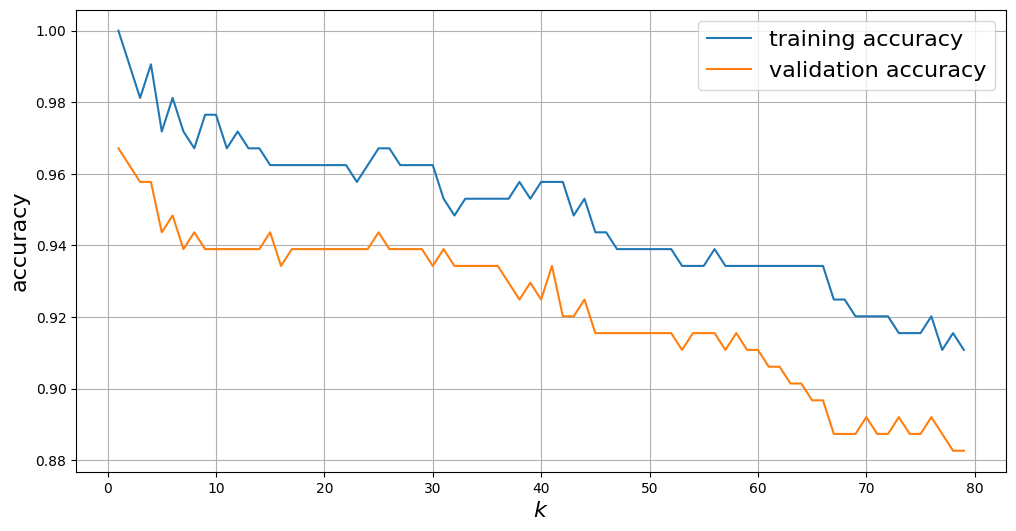

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 80)
for n_neighbors in neighbors_settings:
# build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)# record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train)) # record generalization accuracy
    test_accuracy.append(clf.score(X_valid, y_valid))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="validation accuracy")
plt.ylabel("accuracy", fontsize=16)
plt.xlabel("$k$", fontsize=16)
plt.legend(fontsize=16)
plt.grid(1)
plt.savefig('train_test_accuracy_kNN.png', bbox_inches='tight');
#from here, k=3 seems the best but lot of jump
#can take 10 too because stable around it but less accuracy
#it is a 30 dimensional space so points are very really far.
#k=1 is the best because high accuracy and also stable enough for us

In [45]:
#k=3 seems to be the best

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_trainandvalid, y_trainandvalid)# record training set accuracy
clf.score(X_test, y_test)

0.9440559440559441

## Exercise 1:
( Prof. Dr. Helena Mihaljević )

On the sklearn Wine dataset (function `load_wine` from `sklearn.datasets`), perform a train-test split with 20% test data and `random_state=1`. Similar to the lecture, train a $k$NN model for $k$ from 1 to 30 on the training data and calculate the (in)accuracy on the train-test data. Graph the results as line plots in a figure. You can use the code from the lecture as a guide.

Other interesting chatGPT prompts:
- show an example on how to do knn density estimation in python
- show an example of knn classification in python, without sklearn
- show a numba fast implementation of knn
- benchmark numba vs sklearn on knn 


In [46]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import plotly.express as px

In [47]:
#standardize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [48]:
data = load_wine()

In [49]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [50]:
data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [51]:
data.target.shape

(178,)

In [52]:
data.data.shape

(178, 13)

In [55]:
#df = pd.DataFrame(data = np.c_[data['data'], data['target']],
#columns = data['feature_names'] + ['target'])

In [56]:
X=data.data
Y=data.target

In [60]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data.data)
X=data_scaled

In [58]:
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(data.data)
X=data_scaled

In [61]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split (X, Y, 
                                                 stratify=data.target, test_size=0.2, random_state=1)

In [62]:
Xtrain.shape

(142, 13)

In [63]:
Xtest.shape

(36, 13)

In [64]:
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0     0.0  
1                            3.40   1050.0     0.0  
2                            3.17   1185.0     0.0  
3                            3.45   1480.0     0.0  
4                            2.93    735.0     0.0  
..                            ...      ...     ...  
173                          1.74    740.0     2.0  
174                          1.56    750.0     2.0  
175                          1.56    835.0     2.0  
176                          1.62    840.0     2.0  
177                          1.60    560.0     2.0  

[178 rows x 14 columns]

In [65]:
df.head(5)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0     0.0  
1                          3.40   1050.0     0.0  
2                          3.17   1185.0     0.0  
3                          3.45   1480.0     0.0  
4                          2.93    735.0     0.0

In [66]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [222]:
#we can see std is very different for different features

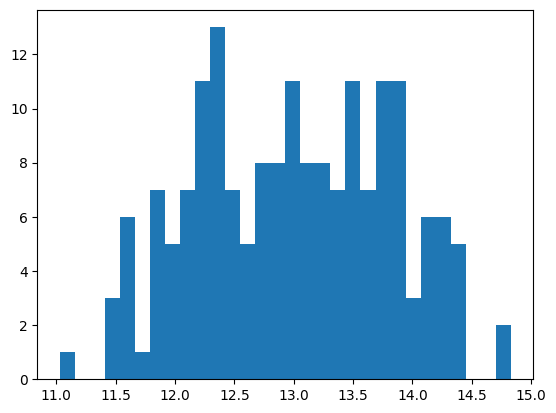

In [67]:
plt.hist(data.data[:,0],30);
#doesn't look gaussian
#if its gaussian then use standard scaler
#if you know the boundaries then use min max scaler

In [68]:
standardized_data=StandardScaler().fit_transform(data.data)
data01=MinMaxScaler().fit_transform(data.data)

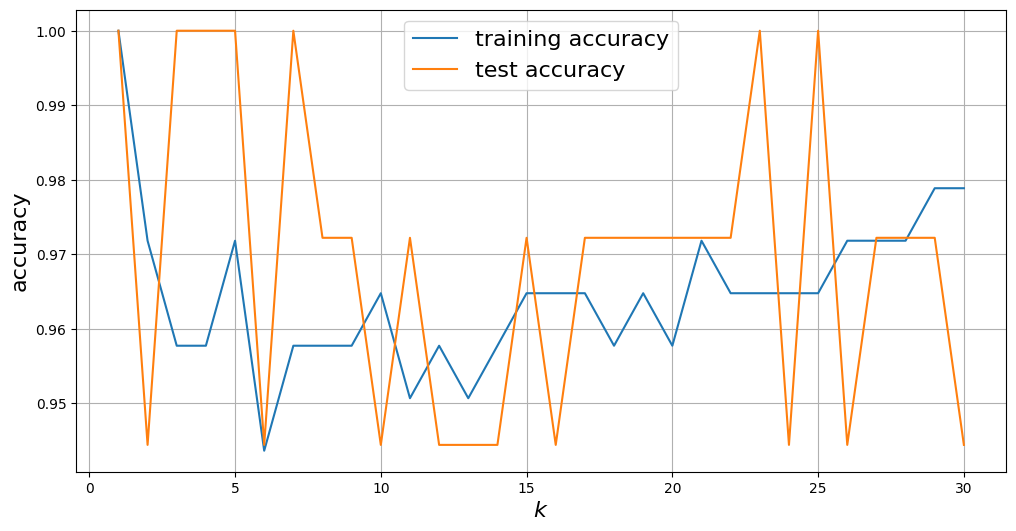

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 31)
for n_neighbors in neighbors_settings:
# build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(Xtrain, Ytrain)# record training set accuracy
    training_accuracy.append(clf.score(Xtrain, Ytrain)) # record generalization accuracy
    test_accuracy.append(clf.score(Xtest, Ytest))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy", fontsize=16)
plt.xlabel("$k$", fontsize=16)
plt.legend(fontsize=16)
plt.grid(1)
plt.savefig('train_test_accuracy_kNN.png', bbox_inches='tight');

In [70]:
#validation is very less so it doesn't generalize

In [71]:
#k=3 seems to be the best

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(Xtrain, Ytrain)# record training set accuracy
clf.score(Xtest, Ytest)

1.0

In [72]:
#3d = px.data
#do PCA

In [73]:
z=PCA(n_components=3,whiten=False).fit_transform(data_scaled)
#so we can see this for the scaled data

In [74]:
z

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

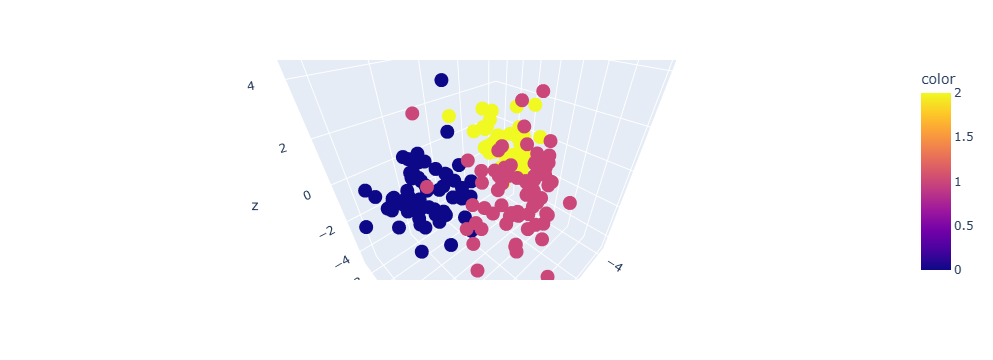

In [75]:
#ad=plt.scatter?
#df = px.data.iris()
fig = px.scatter_3d(z, z[:,0], z[:,1], z[:,2],color=Y)
fig.show()
#so we can see the 3D and see that if we have 1 neighbour, it will tell the class
#because all the classes are perfectly seperated
#this is just double checking to see that KNN=1 is actually correct

In [76]:
px.scatter_3d?

Signature:
px.scatter_3d(
    data_frame=None,
    x=None,
    y=None,
    z=None,
    color=None,
    symbol=None,
    size=None,
    text=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    error_z=None,
    error_z_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    size_max=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    color_continuous_scale=None,
    range_color=None,
    color_continuous_midpoint=None,
    symbol_sequence=None,
    symbol_map=None,
    opacity=None,
    log_x=False,
    log_y=False,
    log_z=False,
    range_x=None,
    range_y=None,
    range_z=None,
    title=None,
    template=None,
    width=None,
    height=None,
) -> plotly.graph_objs._figure.Figure
Docstring:
    In a 3D scatter plot, each row of `data_frame` is represented by a
    symbol mark in 3D space.
    
Para

In [79]:
#zz=PCA(n_components=3,whiten=False).fit_transform(data.data)
zz=PCA(n_components=3,whiten=False).fit_transform(data01)
#so we can see this for the scaled data

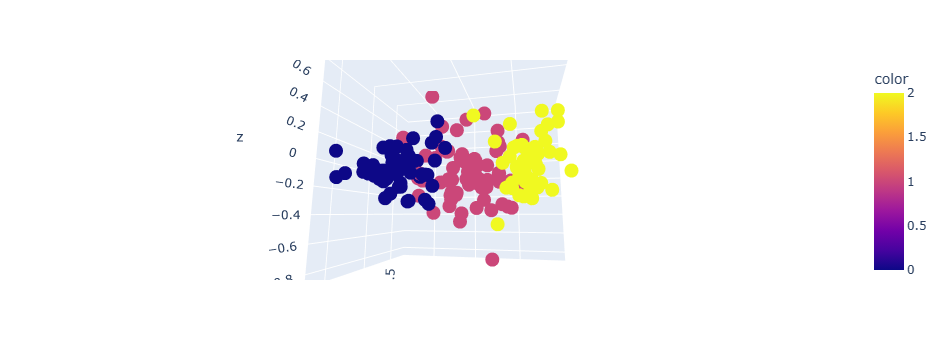

In [80]:
fig1 = px.scatter_3d(zz, zz[:,0], zz[:,1], zz[:,2],color=Y)
fig1.show()

In [81]:
#so we can see that scaling improved seperation because 
#what we see from PCA has changed the distances